In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(csv_path):
    df = pd.read_csv(csv_path)

    features = ['fw_days_uptime', 'fw_number_of_users',
               'fw_load_avg_1_min', 'fw_load_avg_5_min', 'fw_load_avg_15_min']

    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.sort_values('created_at')

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features])

    return scaled_data, scaler, features, df['created_at'], df

In [3]:
scaled_data, scaler, features, timestamps, df =load_and_preprocess_data('uptime status.csv')

In [4]:
from sklearn.ensemble import IsolationForest


In [12]:
iso_forest = IsolationForest(n_estimators=1000, contamination='auto', random_state=42)
outliers = iso_forest.fit_predict(scaled_data)

df['anomaly'] = outliers

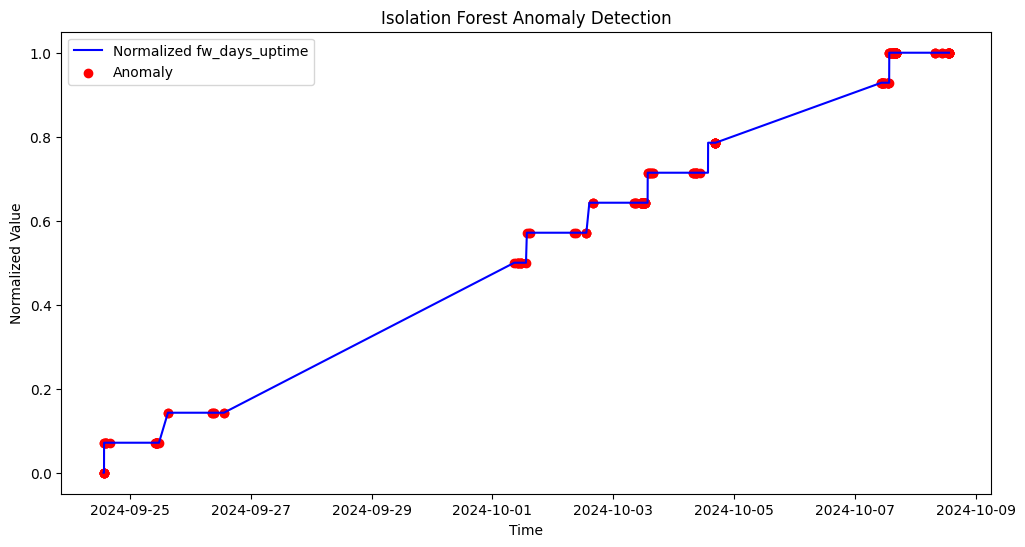

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(timestamps, scaled_data[:, 0], label='Normalized fw_days_uptime', color='blue')
plt.scatter(timestamps[df['anomaly'] == -1], scaled_data[df['anomaly'] == -1, 0], 
            color='red', label='Anomaly')
plt.legend()
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.show()

In [15]:
# Filter data yang dianggap sebagai anomaly
anomalies = df[df['anomaly'] == -1]
count= len(anomalies)
# Pilih hanya kolom yang diinginkan
selected_columns = ['fw_days_uptime', 'fw_number_of_users', 
                    'fw_load_avg_1_min', 'fw_load_avg_5_min', 
                    'fw_load_avg_15_min', 'created_at']

anomalies_selected = anomalies[selected_columns]

# Tampilkan hasil
print("Data yang dianggap sebagai anomaly (hanya kolom yang dipilih):")
print(anomalies_selected)
print("total row=", count)

Data yang dianggap sebagai anomaly (hanya kolom yang dipilih):
     fw_days_uptime  fw_number_of_users  fw_load_avg_1_min  fw_load_avg_5_min  \
0                 3                   1               0.03               0.11   
1                 3                   1               0.08               0.10   
2                 3                   1               0.28               0.15   
3                 3                   1               0.29               0.17   
4                 3                   1               0.11               0.15   
..              ...                 ...                ...                ...   
994              17                   1               0.10               0.11   
996              17                   1               0.10               0.11   
997              17                   1               0.12               0.12   
998              17                   1               0.15               0.12   
999              17                   1       